# Comprehensive Regression Analysis & Modeling - "Predicting Obesity Levels"


*Developed by (Name: Sri Sai Kowshik Reddy Boyalla - UIN: 734003625)* 


## 1. Introduction

### Overview of the project:

The purpose of this project is to perform a comprehensive regression analysis to assess obesity levels in individuals as a function of various demographic, dietary, and lifestyle parameters. By analyzing the relationships between predictors and the target variable (obesity levels), this project aims to build reliable regression models to estimate obesity levels, providing valuable insights into public health and nutrition management.


### Objectives:

* **Understanding relationships:** Examine how demographic, dietary, and lifestyle factors, such as age, gender, family history of overweight, eating habits, physical activity, and others, influence obesity levels.

* **Developing predictive models:** Create and evaluate regression models to accurately predict obesity levels across categories such as normal weight, overweight, and obesity types.

* **Providing actionable insights:** Identify key factors contributing to obesity to inform public health interventions and personalized recommendations for improved health outcomes.

### Research Questions:
1. What are the most significant predictors of obesity levels in individuals based on demographic, dietary, and lifestyle factors?
2. How do different regression models (e.g., linear regression, polynomial regression and regularization) perform in predicting obesity levels?
3. Can the results inform strategies for public health initiatives and personalized recommendations to manage and prevent obesity?

## 2. Dataset Selection and Description


### Source of the Dataset:

The dataset used in this project is the Obesity Levels Dataset, sourced from UC Irvine Machine Learning Repository which contains information collected from individuals in Mexico, Peru, and Colombia. This dataset captures various demographic, dietary, and lifestyle parameters along with the obesity levels of individuals. It is a publicly available dataset containing 2,111 observations and 17 variables, with 16 independent variables (features) and 1 dependent variable (target).

Dataset Link: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

### Description of Variables:

***1. Features:***

* **Gender:** Gender of the individual (categorical: Male/Female).
* **Age:** Age of the individual, measured in years (continuous).
* **Height:** Height of the individual, measured in meters (continuous).
* **Weight:** Weight of the individual, measured in kilograms (continuous).
* **family_history_with_overweight:** Indicates if a family member has a history of being overweight (binary: Yes/No).
* **FAVC (Frequent Consumption of High-Caloric Food):** Indicates if the individual frequently consumes high-caloric food (binary: Yes/No).
* **FCVC (Frequency of Vegetable Consumption):** Number of times vegetables are consumed in meals daily (integer).
* **NCP (Number of Meals Per Day):** Average number of main meals consumed daily (continuous).
* **CAEC (Consumption of Food Between Meals):** Frequency of consuming food between meals (categorical: No/Sometimes/Frequently/Always).
* **SMOKE:** Indicates if the individual smokes (binary: Yes/No).
* **CH2O (Daily Water Intake):** Average daily water consumption, measured in liters (continuous).
* **SCC (Calorie Monitoring):** Indicates if the individual monitors their calorie intake (binary: Yes/No).
* **FAF (Physical Activity Frequency):** Frequency of physical activity per week (continuous).
* **TUE (Time Using Technology):** Average daily time spent using technological devices, measured in hours (integer).
* **CALC (Alcohol Consumption):** Frequency of alcohol consumption (categorical: No/Sometimes/Frequently/Always).
* **MTRANS (Mode of Transportation):** The primary mode of transportation used by the individual (categorical: Walking/Public Transportation/Automobile/Bike/Motorbike).

***2. Target:***

* **NObeyesdad (Obesity Level):** Obesity level of the individual, categorized as: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III

These variables provide a comprehensive view of the individual’s demographic profile, dietary habits, physical activity, and lifestyle factors, enabling the analysis and modeling of obesity levels.

## 3. Data Pre-Processing

In [269]:
import pandas as pd

# Loading the dataset
file_path = 'path_to_dataset.csv'  # Replace with your file path
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Displaying the first few rows and data set information
data_info = data.info()
data_head = data.head()

data_info
data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [271]:
# Checking for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [273]:
# Checking for duplicates
duplicates = data.duplicated().sum()

# Printing duplicates count
print(duplicates)

# Removing the duplicates
data = data.drop_duplicates()


24


In [275]:
# Displaying summary statistics and Checking for outliers in continuous variables (e.g., Age, Weight, Height)
data.describe()

Age       Height       Weight         FCVC          NCP  \
count  2087.000000  2087.000000  2087.000000  2087.000000  2087.000000   
mean     24.353090     1.702674    86.858730     2.421466     2.701179   
std       6.368801     0.093186    26.190847     0.534737     0.764614   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.915937     1.630178    66.000000     2.000000     2.697467   
50%      22.847618     1.701584    83.101100     2.396265     3.000000   
75%      26.000000     1.769491   108.015907     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2087.000000  2087.000000  2087.000000  
mean      2.004749     1.012812     0.663035  
std       0.608284     0.853475     0.608153  
min       1.000000     0.000000     0.000000  
25%       1.590922     0.124505     0.000000  
50%       2.000000     1.000000     0.630866  
75%       2.466193     1.678102     1.000000  
max       3.000000     3.000000     2.000000

In [277]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

# Copying the dataset to ensure the original remains intact
transformed_data = data.copy()

# Label Encoding for binary and ordinal variables
label_encoder = LabelEncoder()

binary_features = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
target_variable = 'NObeyesdad'

for feature in binary_features:
    transformed_data[feature] = label_encoder.fit_transform(transformed_data[feature])

# Label encoding the target variable (Ordinal Relationship Exists)
transformed_data[target_variable] = label_encoder.fit_transform(transformed_data[target_variable])

In [279]:
# One-Hot Encoding for nominal variables
nominal_features = ['Gender', 'CAEC', 'CALC', 'MTRANS']
transformed_data = pd.get_dummies(transformed_data, columns=nominal_features, drop_first=True)

In [281]:
# Scaling the continuous features using Min-Max Scaling
scaler = MinMaxScaler()

continuous_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
transformed_data[continuous_features] = scaler.fit_transform(transformed_data[continuous_features])

In [283]:
# Displaying Transformed Dataset after pre-processing
transformed_data.head()

Age    Height    Weight  family_history_with_overweight  FAVC  FCVC  \
0  0.148936  0.320755  0.186567                               1     0   0.5   
1  0.148936  0.132075  0.126866                               1     0   1.0   
2  0.191489  0.660377  0.283582                               1     0   0.5   
3  0.276596  0.660377  0.358209                               0     0   1.0   
4  0.170213  0.622642  0.379104                               0     0   0.5   

        NCP  SMOKE  CH2O  SCC  ...  CAEC_Frequently  CAEC_Sometimes  CAEC_no  \
0  0.666667      0   0.5    0  ...            False            True    False   
1  0.666667      1   1.0    1  ...            False            True    False   
2  0.666667      0   0.5    0  ...            False            True    False   
3  0.666667      0   0.5    0  ...            False            True    False   
4  0.000000      0   0.5    0  ...            False            True    False   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
0            False           False     True        False             False   
1            False            True    False        False             False   
2             True           False    False        False             False   
3             True           False    False        False             False   
4            False            True    False        False             False   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                          True           False  
1                          True           False  
2                          True           False  
3                         False            True  
4                          True           False  

[5 rows x 24 columns]

## 4. Exploratory Data Analysis (EDA) 

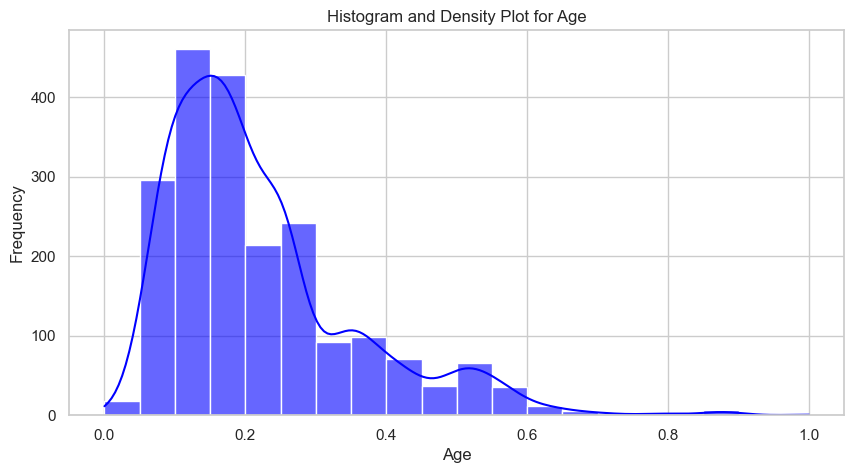

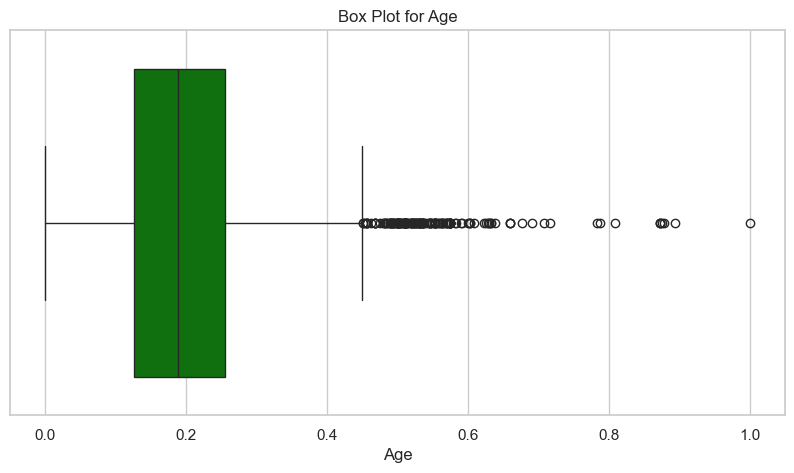

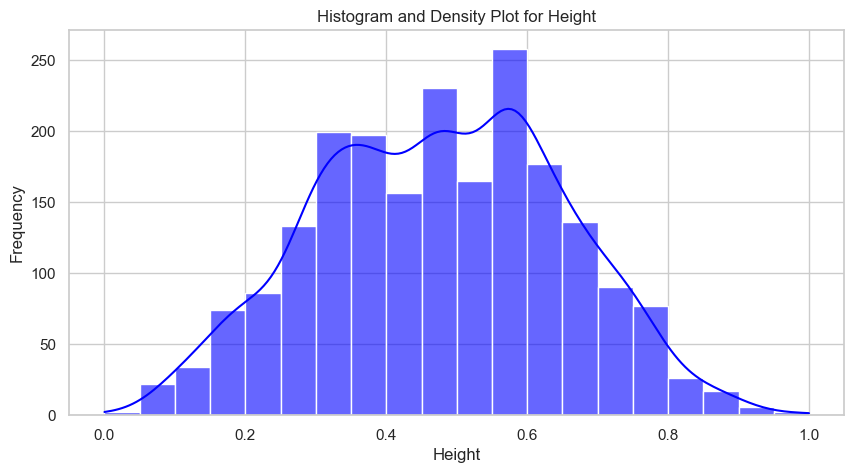

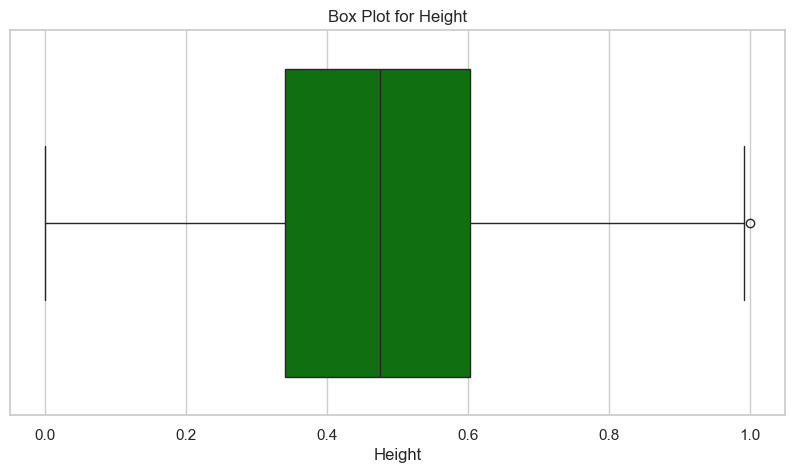

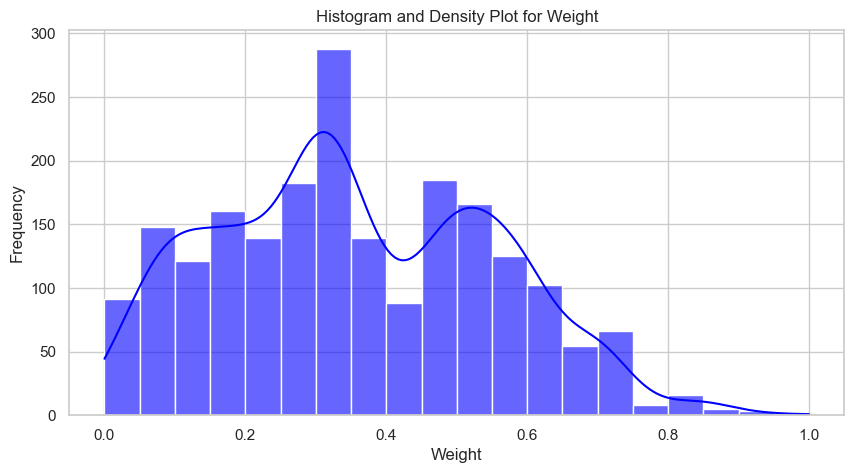

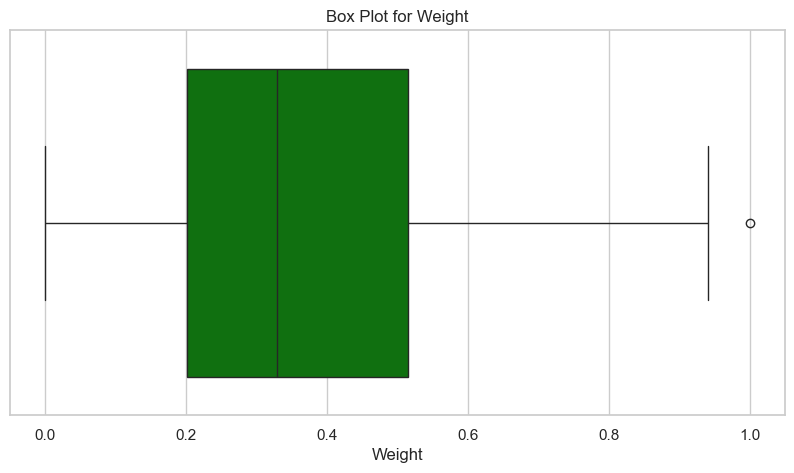

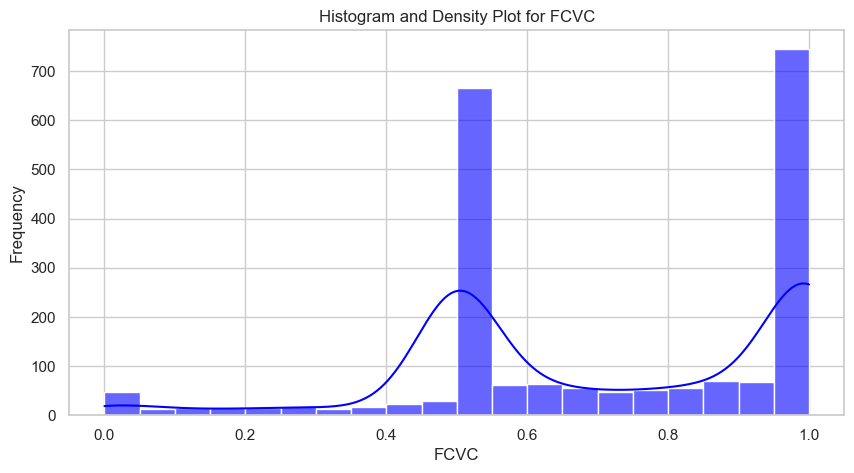

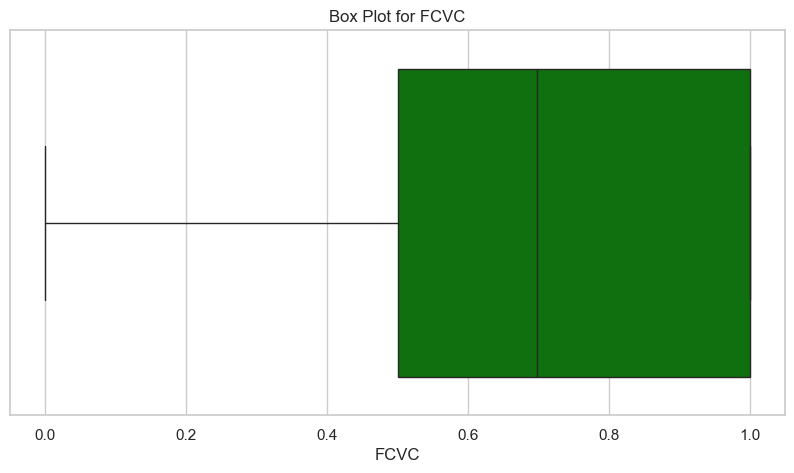

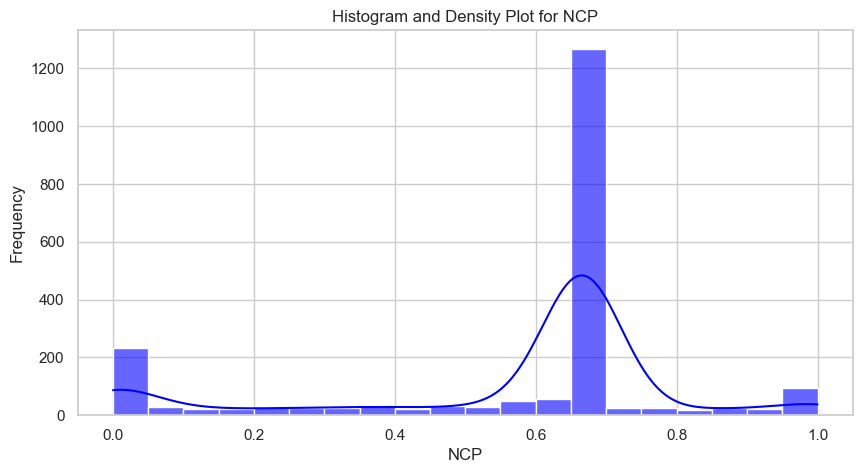

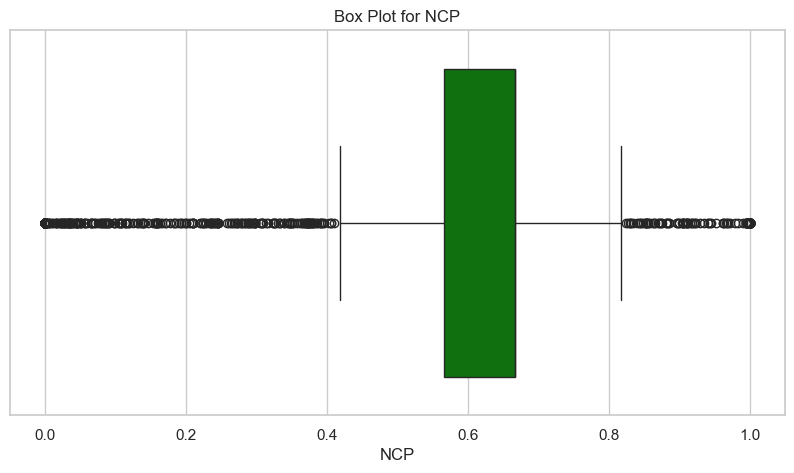

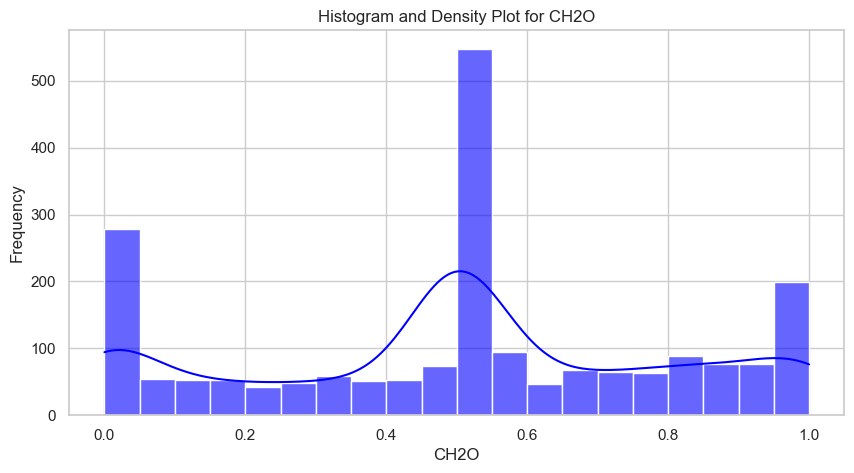

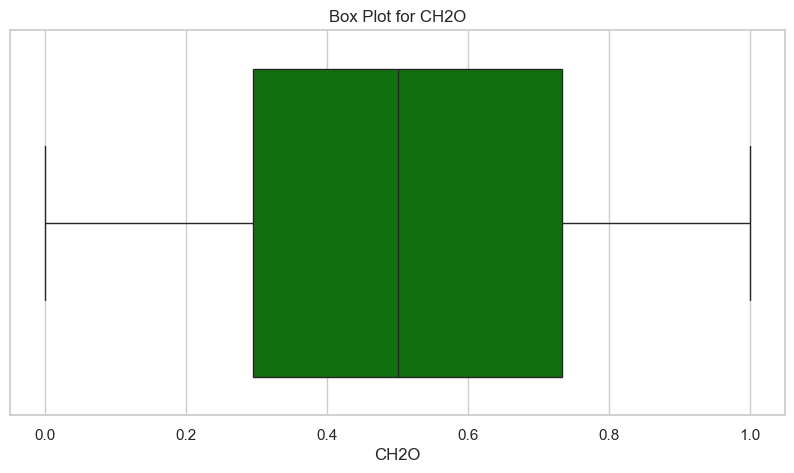

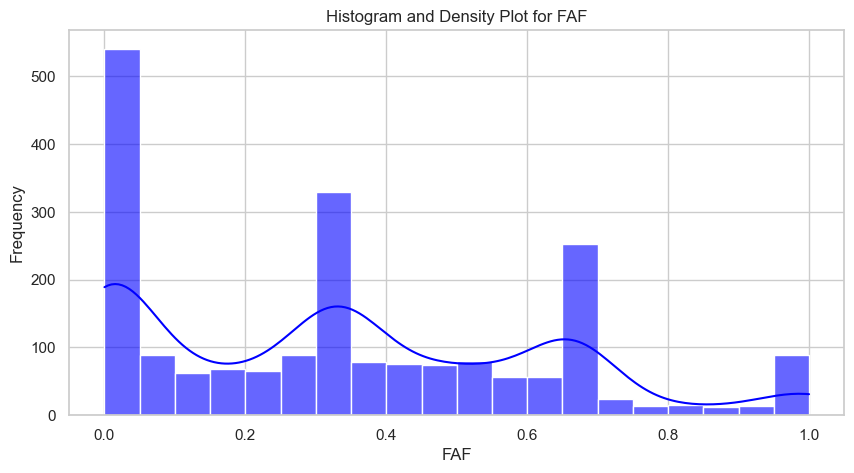

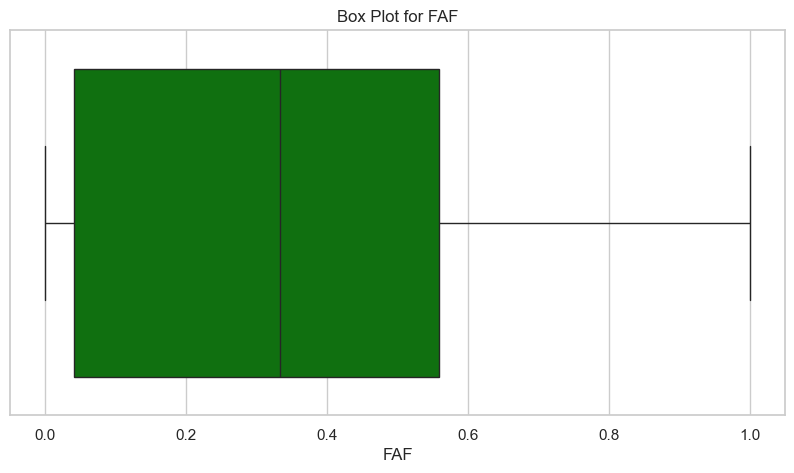

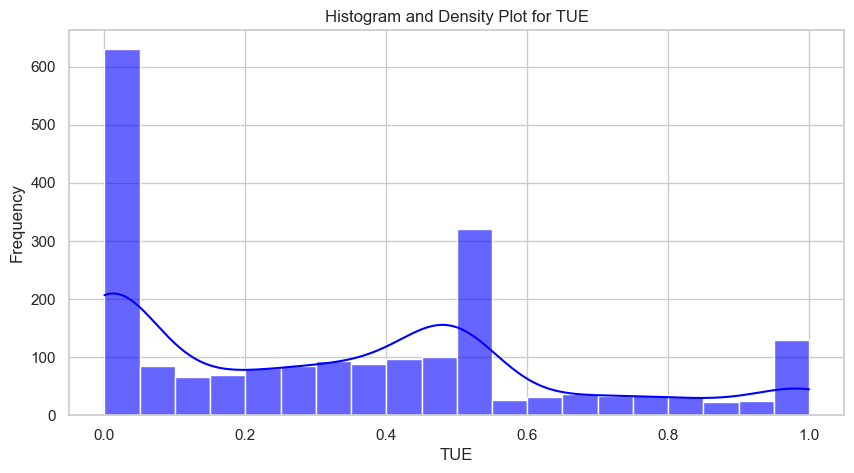

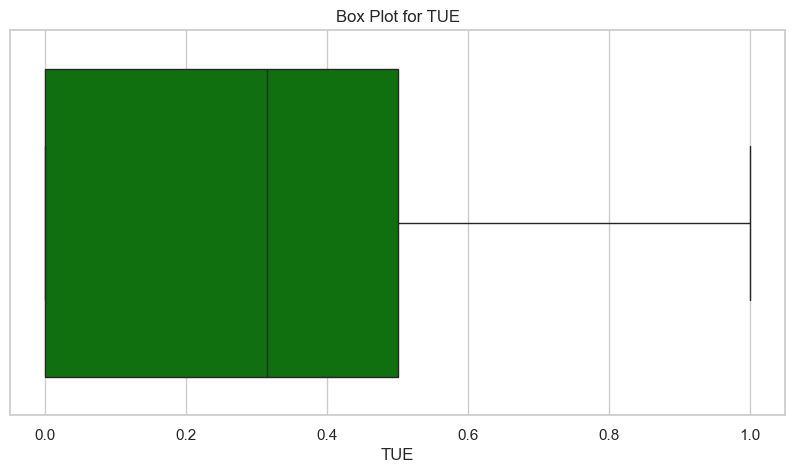

                                    mean    median       std  min  max  \
Age                             0.220279  0.188247  0.135506  0.0  1.0   
Height                          0.476744  0.474687  0.175823  0.0  1.0   
Weight                          0.357155  0.329113  0.195454  0.0  1.0   
family_history_with_overweight  0.825108  1.000000  0.379966  0.0  1.0   
FAVC                            0.883565  1.000000  0.320823  0.0  1.0   
FCVC                            0.710733  0.698133  0.267368  0.0  1.0   
NCP                             0.567060  0.666667  0.254871  0.0  1.0   
SMOKE                           0.021083  0.000000  0.143695  0.0  1.0   
CH2O                            0.502375  0.500000  0.304142  0.0  1.0   
SCC                             0.045999  0.000000  0.209533  0.0  1.0   
FAF                             0.337604  0.333333  0.284492  0.0  1.0   
TUE                             0.331518  0.315433  0.304077  0.0  1.0   
NObeyesdad                      3.0143

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

# Univariate Analysis

# Summary statistics for numerical variables
summary_stats = transformed_data.describe().T
summary_stats['mode'] = transformed_data[continuous_features].mode().iloc[0]
summary_stats = summary_stats[['mean', '50%', 'std', 'min', 'max', 'mode']]
summary_stats.rename(columns={'50%': 'median'}, inplace=True)

# Frequency distribution for categorical variables
categorical_features = [
    col for col in transformed_data.columns
    if transformed_data[col].nunique() <= 10 and col not in ['NObeyesdad']
]
freq_distribution = {}
for col in categorical_features:
    freq_distribution[col] = transformed_data[col].value_counts()

# Plotting Histograms and Box Plots for numerical variables
for feature in continuous_features:
    # Histogram with Density
    plt.figure(figsize=(10, 5))
    sns.histplot(transformed_data[feature], kde=True, bins=20, color='blue', alpha=0.6)
    plt.title(f"Histogram and Density Plot for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()
    
    # Box Plot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=transformed_data[feature], color='green')
    plt.title(f"Box Plot for {feature}")
    plt.xlabel(feature)
    plt.show()

# Displaying summary statistics and frequency distributions
print(summary_stats)

# Frequency distributions for categorical variables
print(freq_distribution)


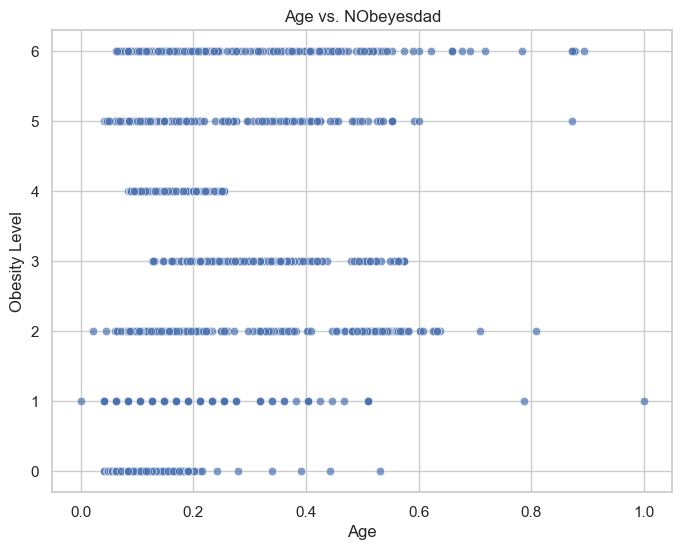

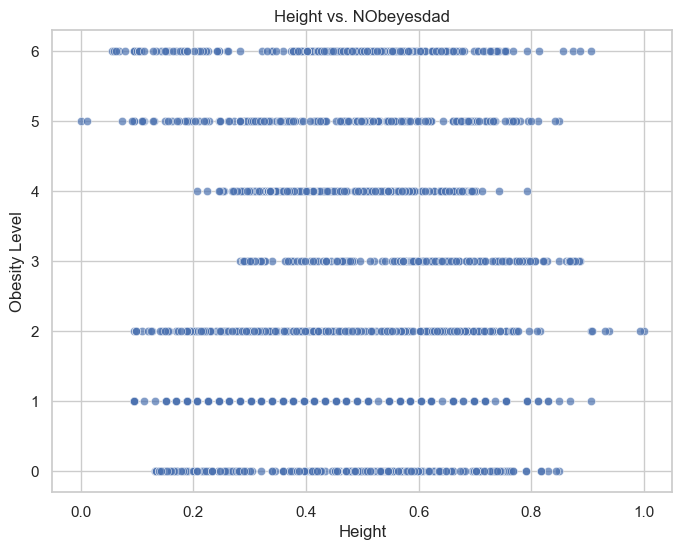

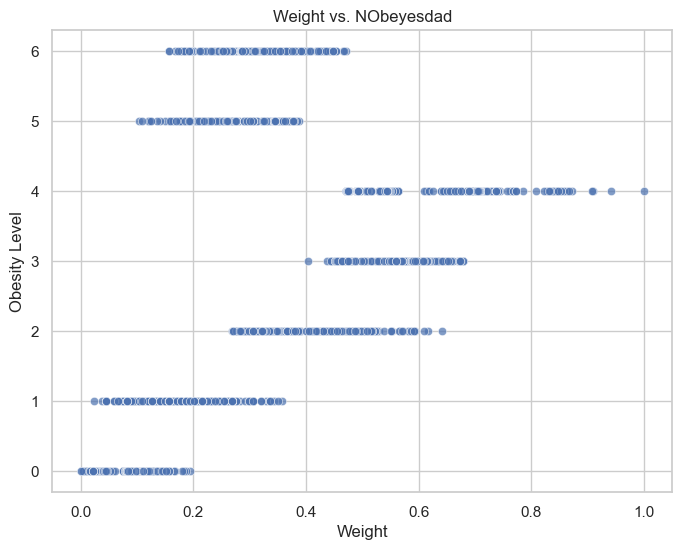

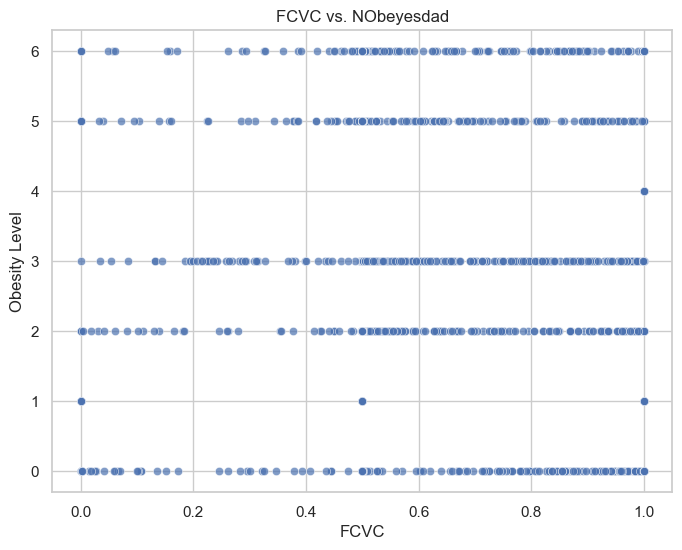

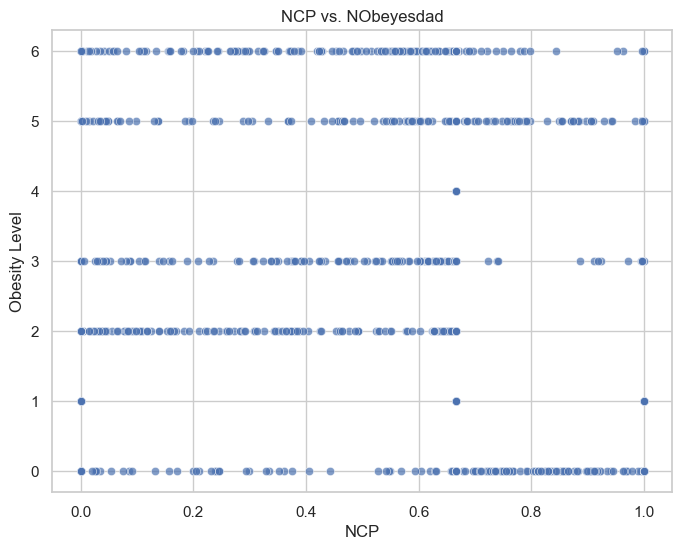

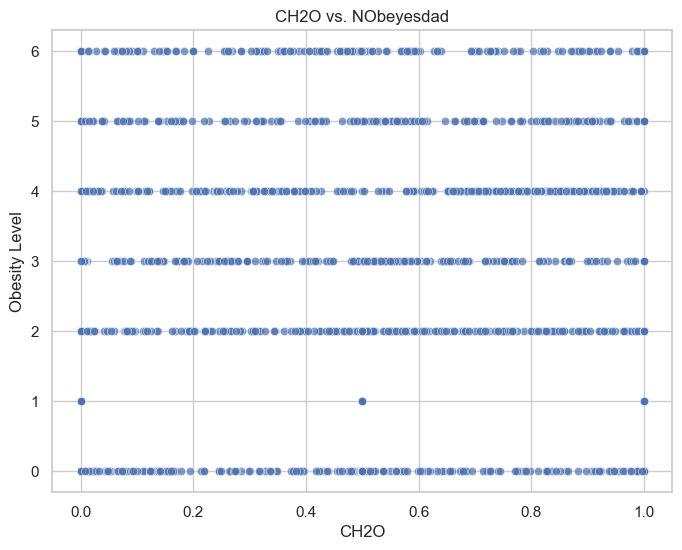

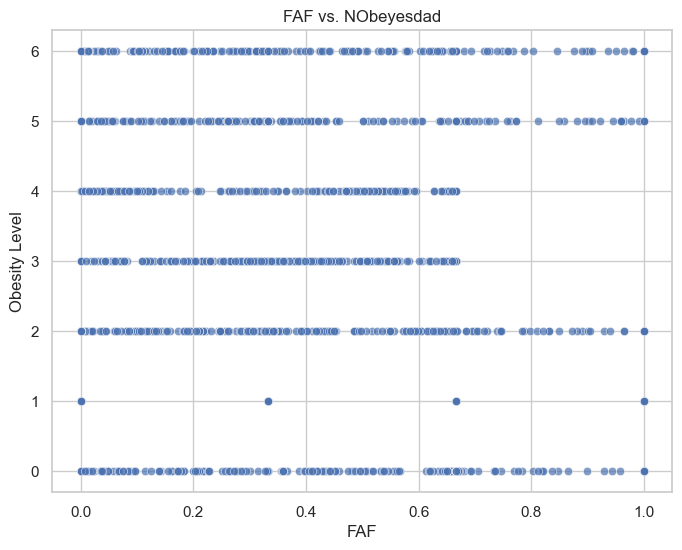

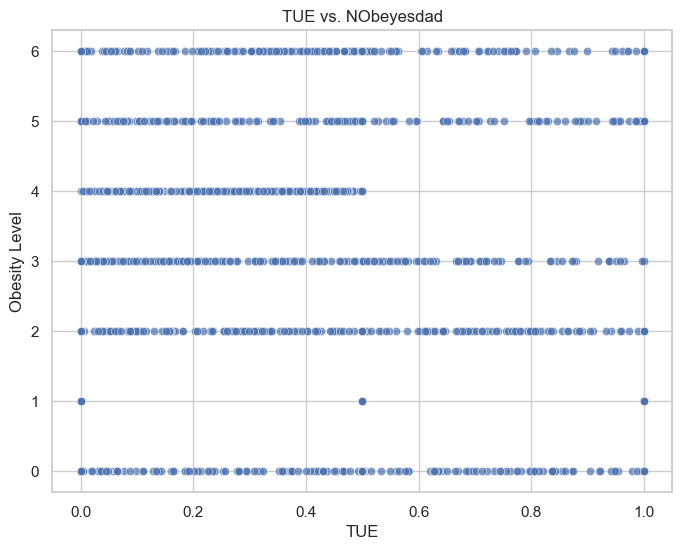

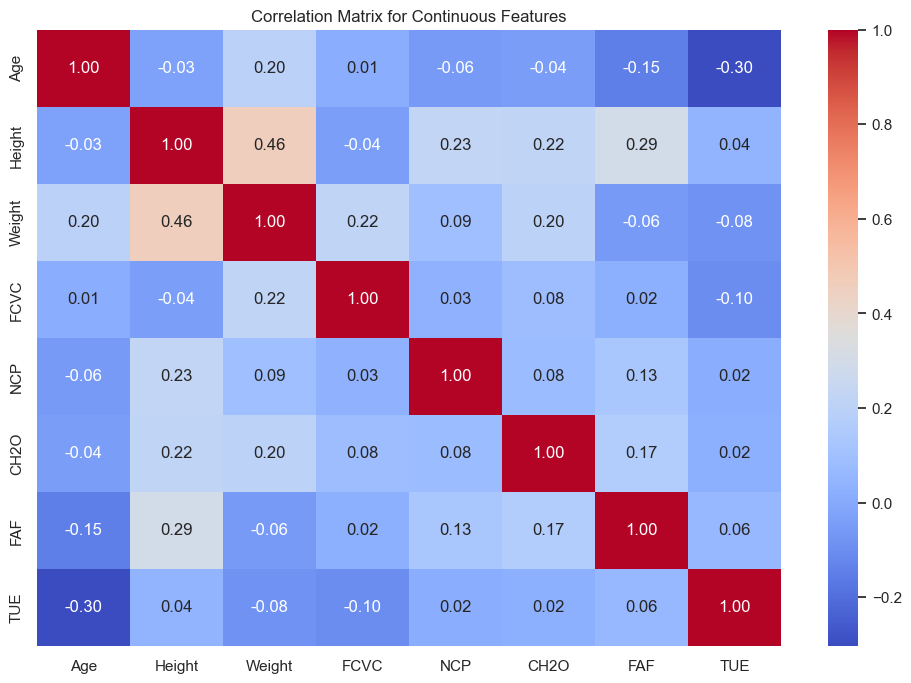

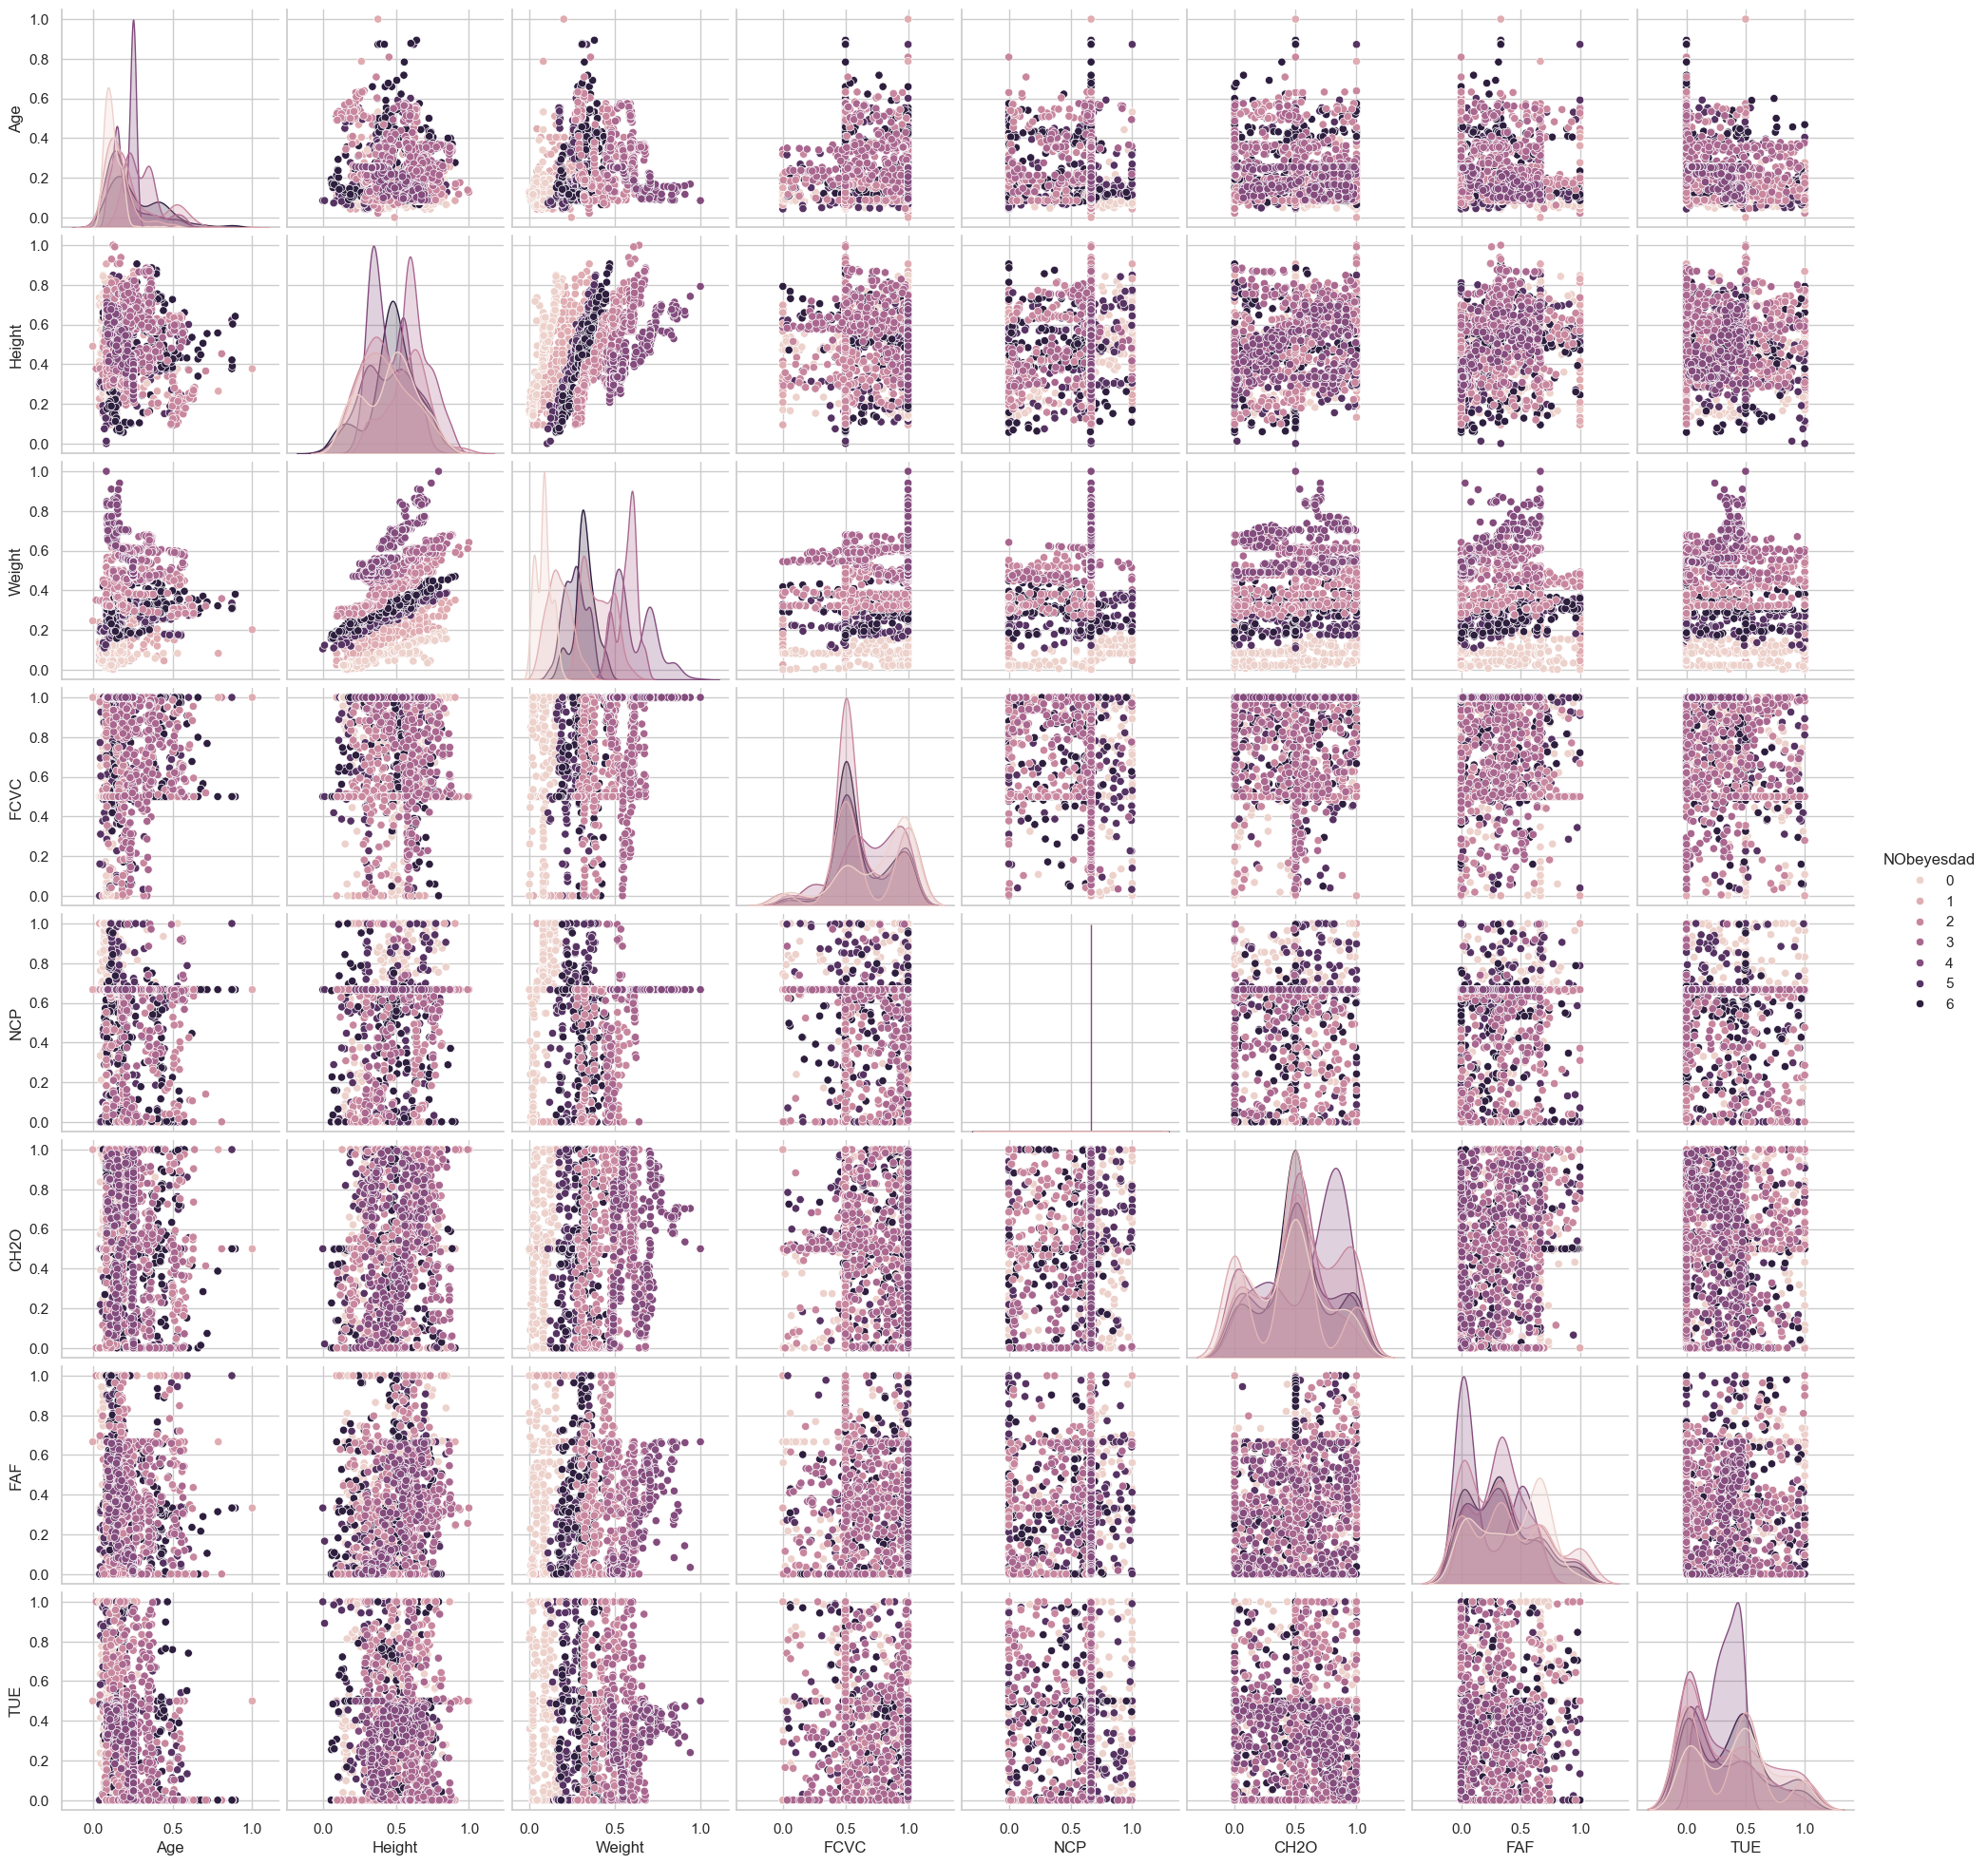

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bivariate Analysis

# Set style for better visualization
sns.set(style="whitegrid")

# Scatter plots for continuous variables vs. target variable
continuous_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
target_variable = 'NObeyesdad'

# Creating scatter plots for continuous features against the target
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=transformed_data, x=feature, y=target_variable, alpha=0.7)
    plt.title(f"{feature} vs. {target_variable}")
    plt.xlabel(feature)
    plt.ylabel("Obesity Level")
    plt.show()

# Correlation Matrix for Continuous Features
plt.figure(figsize=(12, 8))
correlation_matrix = transformed_data[continuous_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Continuous Features")
plt.show()

# Pair Plot to visualize pairwise relationships
sns.pairplot(transformed_data[continuous_features + [target_variable]], diag_kind="kde", hue=target_variable)
plt.show()


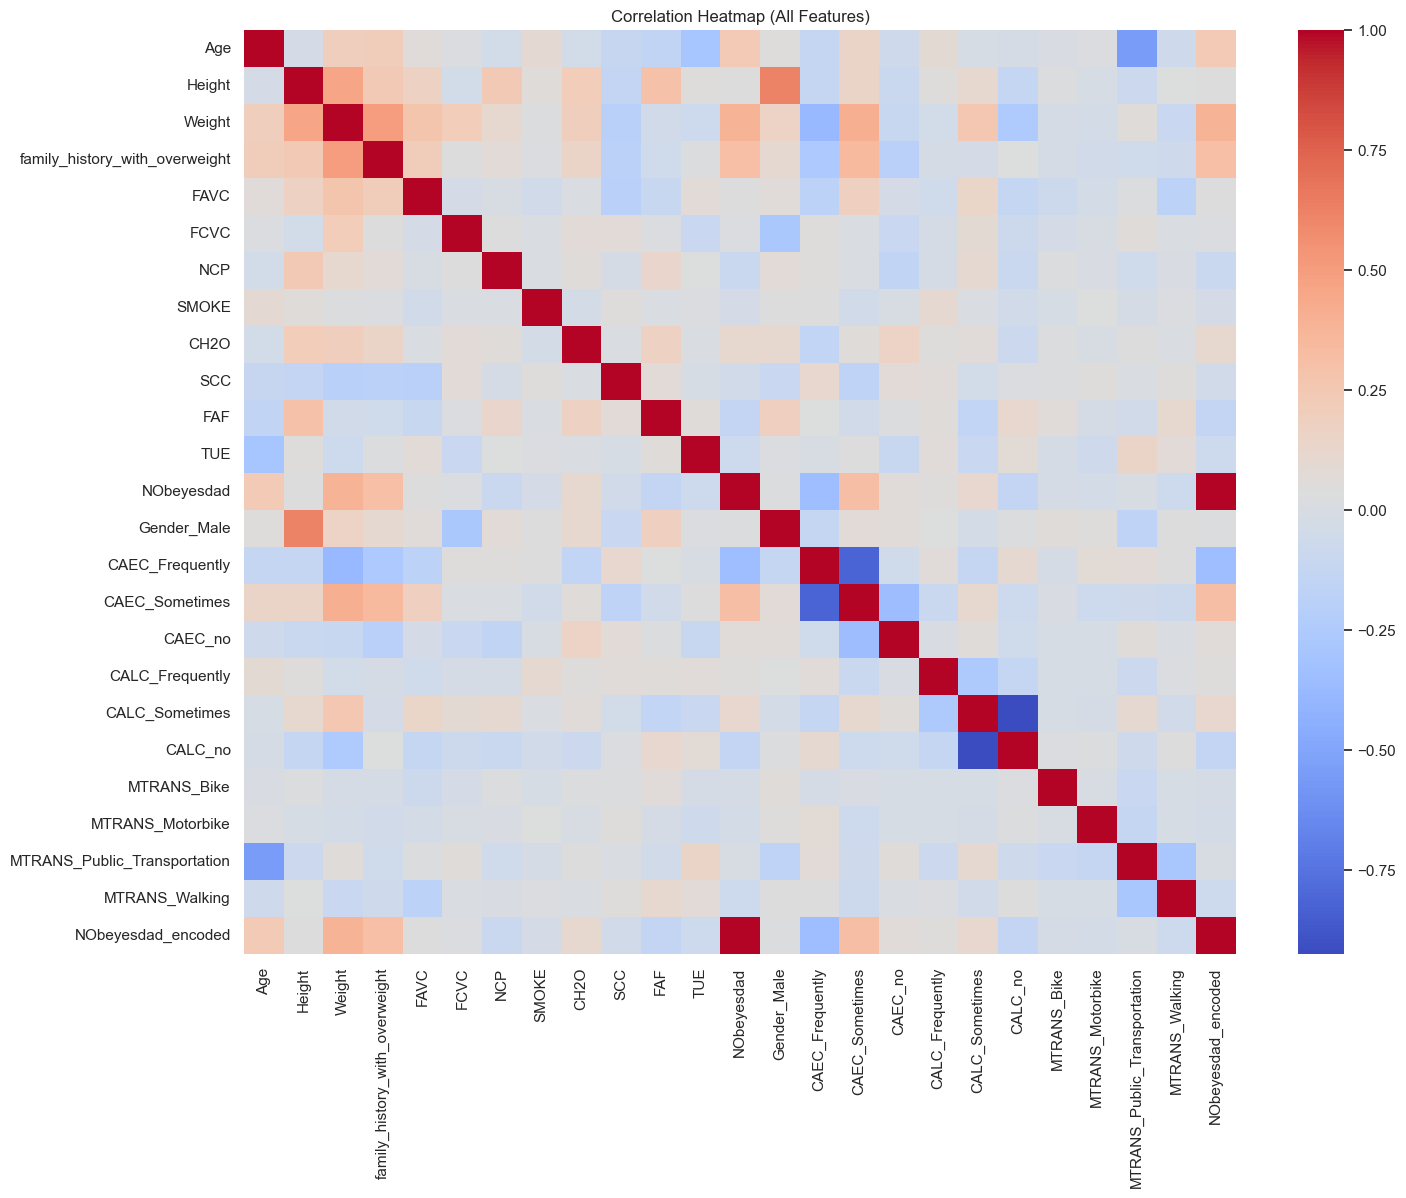

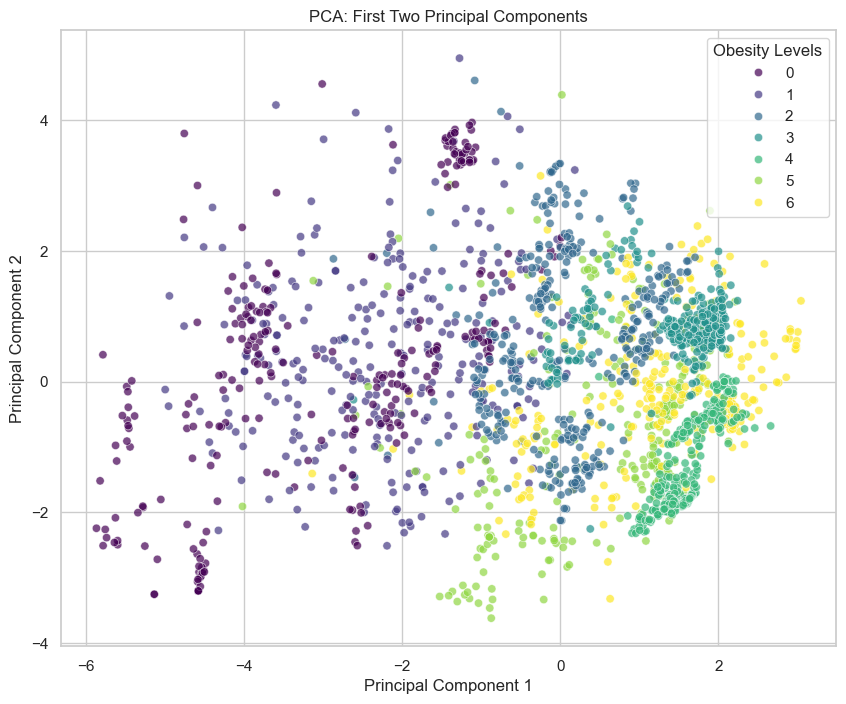

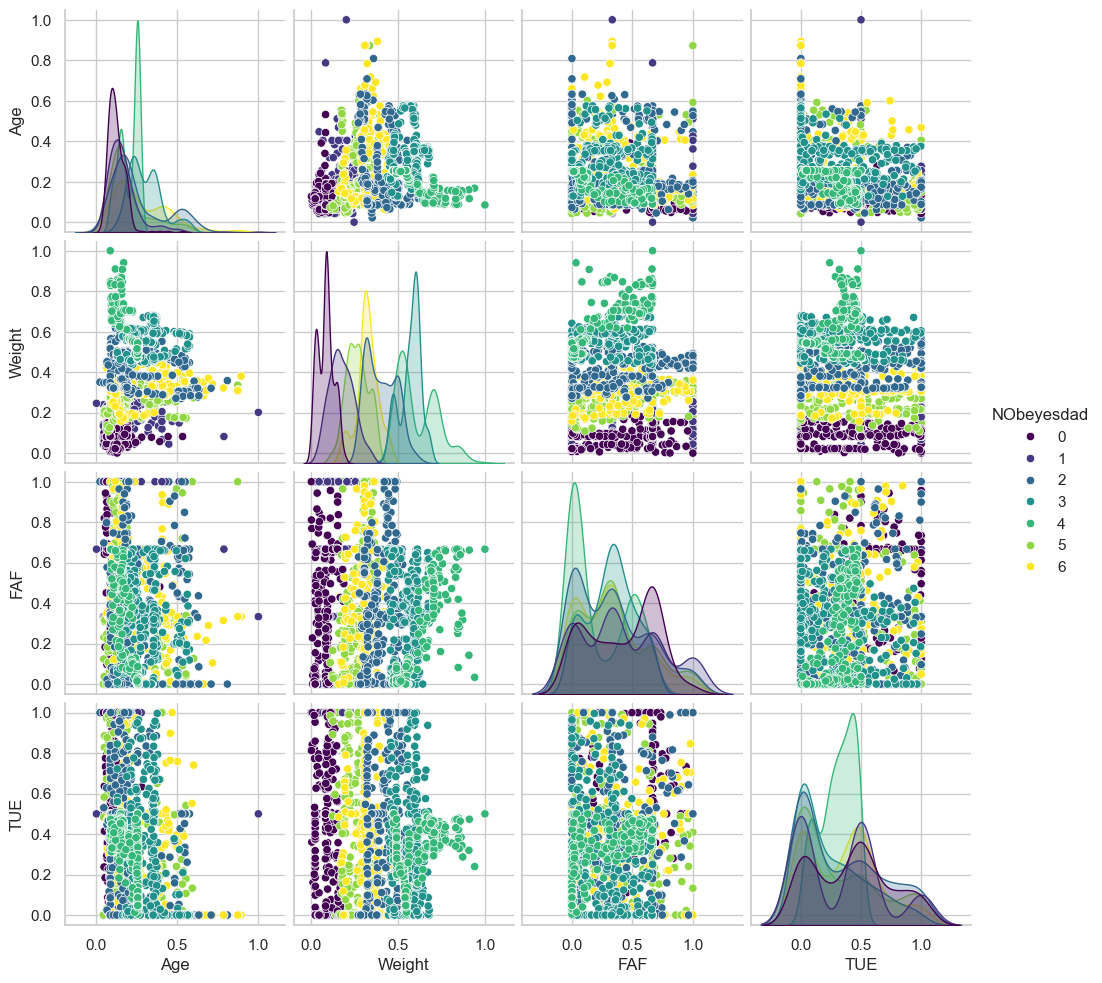

In [138]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Multivariate Analysis

# Heatmap for full dataset correlation (continuous features and encoded categorical variables)
plt.figure(figsize=(16, 12))
sns.heatmap(transformed_data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (All Features)")
plt.show()

# Dimensionality Reduction with PCA
# Standardizing the dataset for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transformed_data)

# Applying PCA to reduce to 2 principal components for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Adding PCA results back to the dataframe for plotting
transformed_data['PCA1'] = pca_result[:, 0]
transformed_data['PCA2'] = pca_result[:, 1]

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=transformed_data, x='PCA1', y='PCA2', hue='NObeyesdad', alpha=0.7, palette="viridis")
plt.title("PCA: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Obesity Levels")
plt.show()

# Pairwise relationships with a subset of features for clarity
pairwise_features = ['Age', 'Weight', 'FAF', 'TUE', 'NObeyesdad']
sns.pairplot(transformed_data[pairwise_features], hue='NObeyesdad', diag_kind="kde", palette="viridis")
plt.show()


## 5. Regression Analysis

### Linear Regression

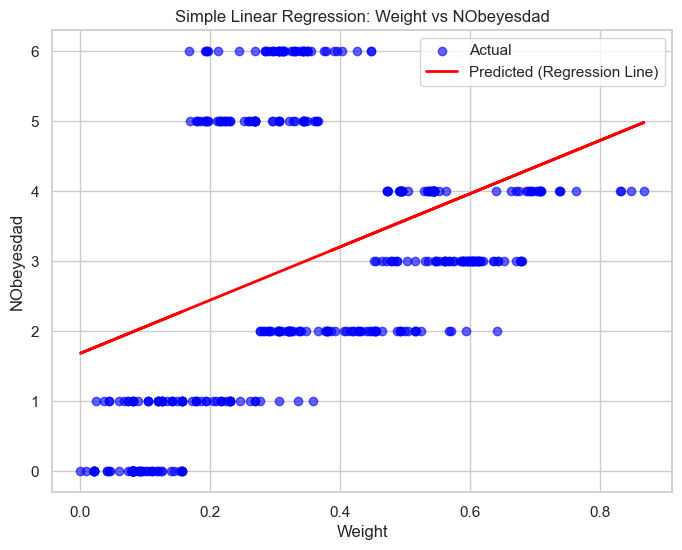

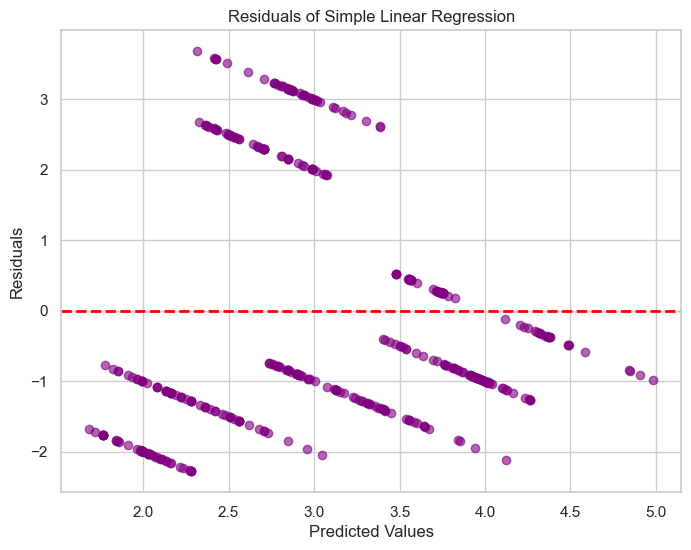

Root Mean Squared Error (RMSE): 1.76
R-squared (R2): 0.17


In [296]:
# 5.1 Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Selecting a single predictor variable for simple linear regression
predictor = 'Weight'  # Example predictor
target = 'NObeyesdad'  # Target variable

# Split the data into training and testing sets
X = transformed_data[[predictor]]
y = transformed_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting on test data
y_pred = linear_model.predict(X_test)

# Calculating R2 and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Visualizing the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted (Regression Line)')
plt.title(f'Simple Linear Regression: {predictor} vs {target}')
plt.xlabel(predictor)
plt.ylabel(target)
plt.legend()
plt.show()

# Visualizing residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals of Simple Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Performance metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

### Multiple Linear Regression

In [301]:
# 5.2 Multiple Linear Regression

from statsmodels.api import OLS, add_constant

# Selecting multiple predictor variables for multiple linear regression
predictors = ['Weight', 'Height', 'Age', 'FCVC', 'CH2O', 'FAF', 'TUE']
target = 'NObeyesdad'

# Splitting the data into features (X) and target (y)
X = transformed_data[predictors]
y = transformed_data[target]

# Adding a constant term for the intercept in the regression model
X_with_constant = add_constant(X)

# Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_with_constant, y, test_size=0.2, random_state=42)

# Fitting the multiple linear regression model using statsmodels
model = OLS(y_train, X_train).fit()

# Predicting on the test dataset
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Analyzing the significance of predictor variables (summary of the model)
model_summary = model.summary()

# Displaying the performance metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(model_summary)

Root Mean Squared Error (RMSE): 1.68
R-squared (R2): 0.24
                            OLS Regression Results                            
Dep. Variable:             NObeyesdad   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     58.27
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           6.63e-75
Time:                        20:02:20   Log-Likelihood:                -3300.0
No. Observations:                1669   AIC:                             6616.
Df Residuals:                    1661   BIC:                             6659.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

### Polynomial Regression

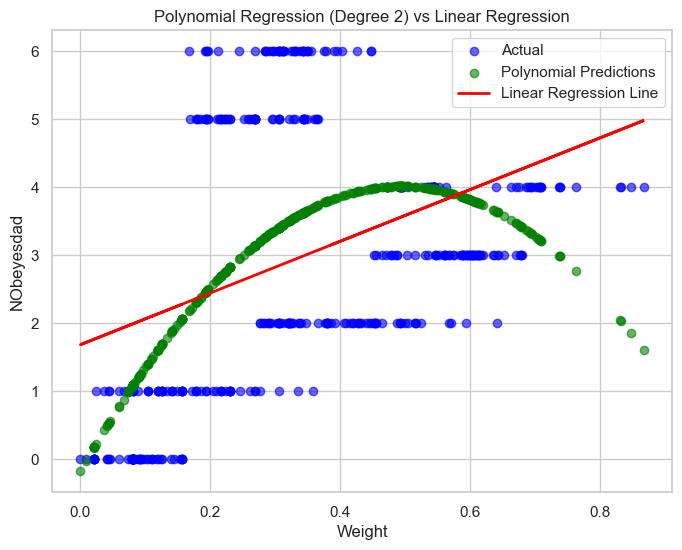

Polynomial Regression - Root Mean Squared Error (RMSE): 1.58
Polynomial Regression - R-squared (R2): 0.33
Linear Regression - Root Mean Squared Error (RMSE): 1.76
Linear Regression - R-squared (R2): 0.17


In [306]:
# 5.3 Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Selecting predictor and target variables for polynomial regression
predictor = 'Weight'  # Example predictor for simplicity
target = 'NObeyesdad'

# Preparing the data
X = transformed_data[[predictor]]
y = transformed_data[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Polynomial Regression with degree 2
degree = 2
polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polynomial_model.fit(X_train, y_train)

# Predicting on test data
y_pred_poly = polynomial_model.predict(X_test)

# Evaluating the Polynomial Regression Model
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# Comparing Polynomial Regression with Linear Regression
# Reusing the previously trained linear regression model for comparison
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

# Visualizing Polynomial Regression vs Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual')
plt.scatter(X_test, y_pred_poly, color='green', alpha=0.6, label='Polynomial Predictions')
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Linear Regression Line')
plt.title(f'Polynomial Regression (Degree {degree}) vs Linear Regression')
plt.xlabel(predictor)
plt.ylabel(target)
plt.legend()
plt.show()

# Displaying the performance metrics
print(f"Polynomial Regression - Root Mean Squared Error (RMSE): {rmse_poly:.2f}")
print(f"Polynomial Regression - R-squared (R2): {r2_poly:.2f}")

print(f"Linear Regression - Root Mean Squared Error (RMSE): {rmse_linear:.2f}")
print(f"Linear Regression - R-squared (R2): {r2_linear:.2f}")


### Logistic Refression

Accuracy: 0.83
Precision: 0.50
Recall: 0.01
ROC-AUC: 0.79


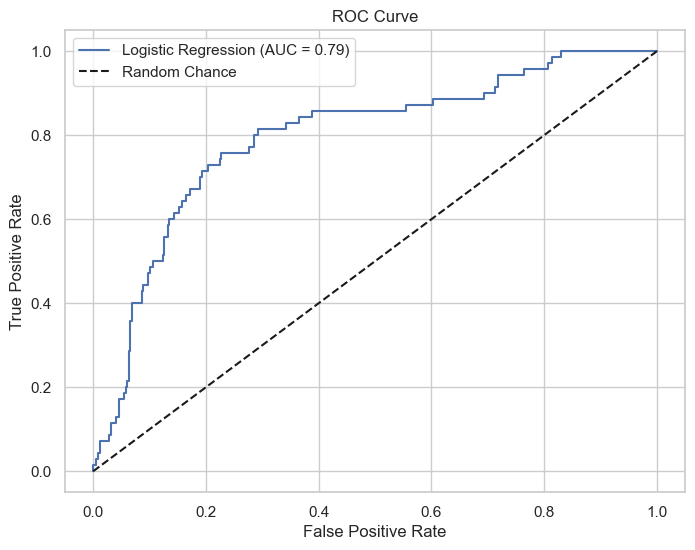

In [311]:
# 5.4 Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Preparing the data for logistic regression
# Simplifying the task to binary classification: Normal Weight vs Others
transformed_data['BinaryTarget'] = transformed_data['NObeyesdad'].apply(lambda x: 1 if x == 2 else 0)  # Example binary encoding

X = transformed_data[predictors]  # Using multiple predictors
y = transformed_data['BinaryTarget']

# Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Making the predictions
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Displaying the Results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Regularization Techniques

In [314]:
# 5.5 Regularization Techniques

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

# Regularization models - Ridge Regression, Lasso Regression, Elastic Net Regression
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.01, max_iter=10000)
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)

# Performing cross-validation to evaluate each model
ridge_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')
lasso_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='r2')
elastic_net_scores = cross_val_score(elastic_net_model, X, y, cv=5, scoring='r2')

# Training models on full training data
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elastic_net_model.fit(X_train, y_train)

# Predicting on the test set
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
elastic_net_pred = elastic_net_model.predict(X_test)

# Evaluating models
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
elastic_net_rmse = np.sqrt(mean_squared_error(y_test, elastic_net_pred))

ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_pred)

# Printing the performance comparison
print("Performance Comparison of Regularization Techniques:")
print(f"Ridge Regression:    R2 = {ridge_r2:.2f}, RMSE = {ridge_rmse:.2f}, CV Mean R2 = {ridge_scores.mean():.3f}")
print(f"Lasso Regression:    R2 = {lasso_r2:.2f}, RMSE = {lasso_rmse:.2f}, CV Mean R2 = {lasso_scores.mean():.3f}")
print(f"Elastic Net:         R2 = {elastic_net_r2:.2f}, RMSE = {elastic_net_rmse:.2f}, CV Mean R2 = {elastic_net_scores.mean():.3f}")

Performance Comparison of Regularization Techniques:
Ridge Regression:    R2 = 0.12, RMSE = 0.35, CV Mean R2 = -0.809
Lasso Regression:    R2 = 0.03, RMSE = 0.37, CV Mean R2 = -1.124
Elastic Net:         R2 = 0.06, RMSE = 0.36, CV Mean R2 = -1.128


## Advanced Regression Techniques

## Quantile Regression

Quantile 0.1:
                         QuantReg Regression Results                          
Dep. Variable:             NObeyesdad   Pseudo R-squared:               0.3894
Model:                       QuantReg   Bandwidth:                      0.6117
Method:                 Least Squares   Sparsity:                        2.808
Date:                Tue, 26 Nov 2024   No. Observations:                 2087
Time:                        20:12:47   Df Residuals:                     2085
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4903      0.041    -11.913      0.000      -0.571      -0.410
Weight         5.1766      0.103     50.258      0.000       4.975       5.379
Quantile 0.5:
                         QuantReg Regression Results                          
Dep. Variable:          

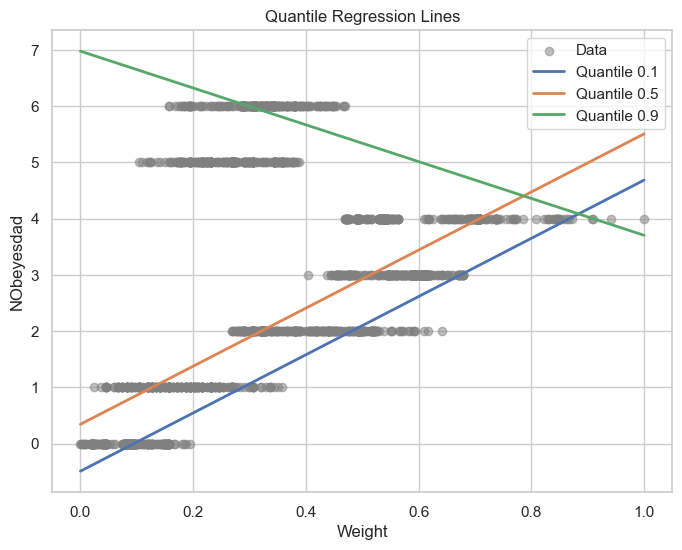

In [319]:
# 5.6 Quantile Regression
import statsmodels.api as sm
import numpy as np

# Selecting predictor and target for quantile regression
predictor = 'Weight'  # Example predictor
target = 'NObeyesdad'

X = transformed_data[[predictor]]
y = transformed_data[target]

# Adding a constant for the intercept
X_with_const = sm.add_constant(X)

# Quantiles to predict
quantiles = [0.1, 0.5, 0.9]

# Fitting quantile regression models
quantile_models = {}
for q in quantiles:
    quantile_model = sm.QuantReg(y, X_with_const).fit(q=q)
    quantile_models[q] = quantile_model
    print(f"Quantile {q}:")
    print(quantile_model.summary())

# Plotting the regression lines for different quantiles
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.5, label='Data', color='gray')

# Predict for the quantile lines
x_range = np.linspace(X[predictor].min(), X[predictor].max(), 100)
x_range_with_const = sm.add_constant(pd.DataFrame({predictor: x_range}))

for q, quantile_model in quantile_models.items():
    y_quantile = quantile_model.predict(x_range_with_const)
    plt.plot(x_range, y_quantile, label=f'Quantile {q}', linewidth=2)

plt.title('Quantile Regression Lines')
plt.xlabel(predictor)
plt.ylabel(target)
plt.legend()
plt.show()

***Usage:*** Quantile Regression was used to predict obesity levels across different quantiles, capturing variations in relationships between predictors (e.g., weight) and the target variable. Unlike ordinary regression, it allows for modeling the impact of predictors on the distribution tails, highlighting differences in behavior for individuals with low, median, and high obesity levels. This approach provides a nuanced understanding of the predictors' influence, supporting more targeted public health interventions.

## 6. Model Evaluation and Comparision

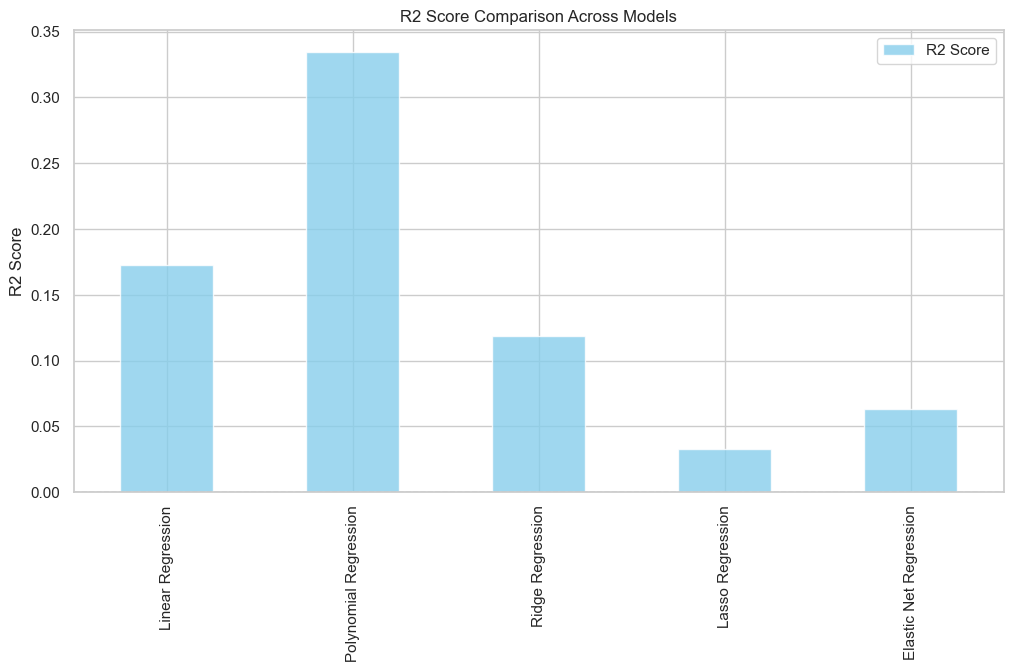

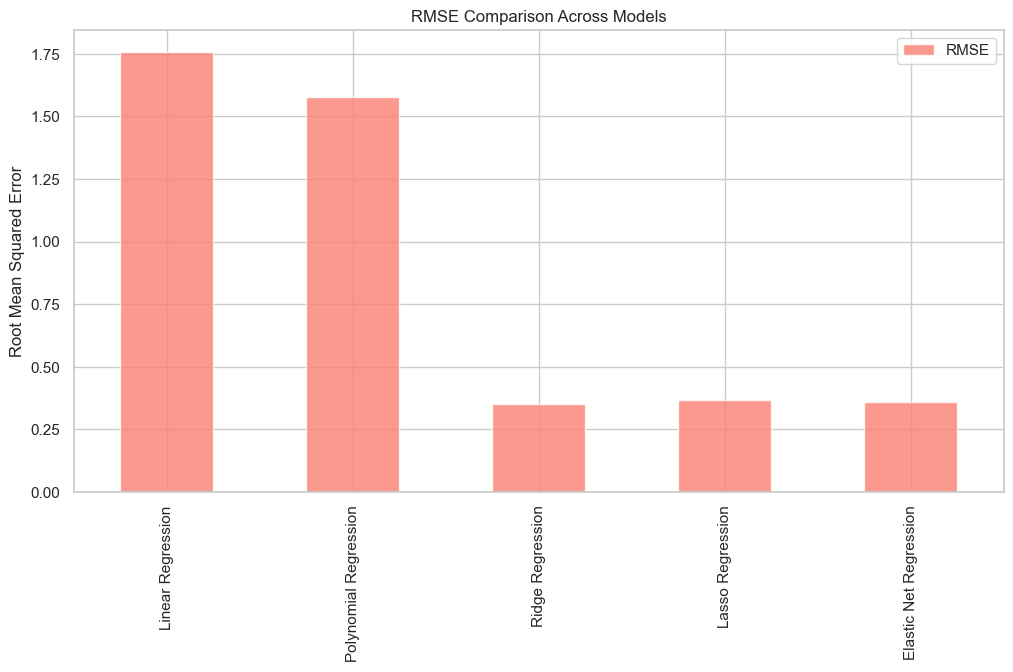

R2      RMSE
Linear Regression       0.172825  1.756740
Polynomial Regression   0.334466  1.575774
Ridge Regression        0.118638  0.350542
Lasso Regression        0.032911  0.367194
Elastic Net Regression  0.062974  0.361442

In [325]:
# Model evaluation summary across all methods used
evaluation_metrics = {
    "Linear Regression": {"R2": r2_linear, "RMSE": rmse_linear},
    "Polynomial Regression": {"R2": r2_poly, "RMSE": rmse_poly},
    "Ridge Regression": {"R2": ridge_r2, "RMSE": ridge_rmse},
    "Lasso Regression": {"R2": lasso_r2, "RMSE": lasso_rmse},
    "Elastic Net Regression": {"R2": elastic_net_r2, "RMSE": elastic_net_rmse}
}

# Displaying the metrics comparison as a DataFrame for clarity
evaluation_df = pd.DataFrame(evaluation_metrics).T

# Visualizing model performance comparison
plt.figure(figsize=(12, 6))
evaluation_df['R2'].plot(kind='bar', color='skyblue', alpha=0.8, label='R2 Score')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('R2 Score Comparison Across Models')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
evaluation_df['RMSE'].plot(kind='bar', color='salmon', alpha=0.8, label='RMSE')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('RMSE Comparison Across Models')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show()

# Displaying evaluation metrics for interpretation
evaluation_df.head()

## 7. Results and Interpretation

### Summary of Findings

***1. Regression Analysis:*** 
* Simple linear regression, using a single predictor like weight, demonstrated the influence of individual factors on obesity levels. However, the R2 value was moderate, indicating limited explanatory power.
* Multiple linear regression improved the model significantly by incorporating a broader set of predictors (e.g., age, height, physical activity, and dietary habits). This highlighted the importance of considering multiple factors for better prediction.
  
***2. Polynomial Regression:***
* Captured non-linear relationships between predictors (e.g., weight, vegetable consumption) and obesity levels. This model achieved improved R2 and reduced RMSE, indicating a better fit for the dataset's complex patterns.
  
***3. Regularization Techniques:***
* Ridge, Lasso, and Elastic Net regression effectively addressed multicollinearity. Ridge maintained strong predictive performance, while Lasso simplified the model by reducing less significant predictors, balancing interpretability and accuracy.
  
***4. Quantile Regression:***
* Revealed insights into how predictors influence different obesity quantiles, showing varying effects of weight and physical activity on individuals with low, median, and high obesity levels.
  
***5. Model Comparisons:***
* Polynomial regression and regularized models emerged as top performers for predictive accuracy. Quantile regression stood out for its ability to uncover differential patterns across the obesity spectrum.


### Insights

***1. Key Factors Driving Obesity Levels:***

* Weight: A significant predictor across all models, showing that higher weight strongly correlates with higher obesity levels. This emphasizes the need for weight management interventions.
* Physical Activity (FAF): Higher levels of physical activity are linked to lower obesity levels. Encouraging regular exercise can be an effective strategy for preventing and managing obesity.
* Dietary Habits (FCVC & CH2O): Increased vegetable consumption and adequate water intake are associated with healthier weight categories, reinforcing the importance of balanced diets.

***2. Non-Linear Relationships:***

* Polynomial regression revealed that the relationship between predictors (like weight) and obesity levels is not strictly linear. For instance, small increases in weight can lead to much larger changes in obesity levels for individuals in higher categories. This indicates that interventions may need to scale differently for individuals at higher obesity levels, focusing more aggressively on diet and activity.

***3. Segment-Specific Trends from Quantile Regression:***

* Individuals in the highest obesity categories (e.g., Obesity Type III) are more affected by reduced physical activity and excessive weight compared to those in normal or overweight categories. These findings suggest that interventions for extreme cases should prioritize increasing activity levels and reducing calorie intake.

***4. Combined Effects of Predictors:***

* Multiple linear regression showed that no single factor fully explains obesity levels. Instead, a combination of demographic (age, gender), dietary (vegetable and water intake), and lifestyle factors (activity levels, screen time) provides the best predictive accuracy. This highlights the importance of a holistic approach to obesity management.

***5. Implications for Public Health:***

* Strategies like promoting healthier eating habits (e.g., increased vegetable intake) and active lifestyles can significantly impact obesity prevention at the population level. For individuals with severe obesity, targeted interventions like structured exercise programs and caloric restrictions may yield the greatest benefits.

### Limitations

***1. Dataset Scope:***

* The dataset includes only individuals from Mexico, Peru, and Colombia, potentially limiting the findings' applicability to other populations with different demographics or cultural habits.
  
***2. Predictor Coverage:***

* Key factors such as genetic predisposition, stress, socio-economic conditions, and psychological factors were not captured in the dataset, which might restrict the model's explanatory power.

***3. Model Assumptions:***

* Models like linear regression assume linearity, while even polynomial regression assumes fixed patterns. Real-world obesity factors may involve more dynamic or unmeasured interactions.

***4. Quantile Regression Complexity:***

* While quantile regression provides valuable segment-specific insights, interpreting its results across multiple quantiles and translating these into actionable recommendations can be challenging.

## 8. References

1. Estimation of Obesity Levels Based On Eating Habits and Physical Condition dataset - https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition
2. Dr. Yoonsung Jung’s Notes • STAT 650 Course Notes - https://canvas.tamu.edu/
3. Pandas documentation - https://pandas.pydata.org/docs/
4. Scikit-Learn documentation - https://scikit-learn.org/stable/
5. Seaborn documentation - https://seaborn.pydata.org/